# 7-1 Numpy의 polyfit으로 회귀(regression)분석

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [3]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [5]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


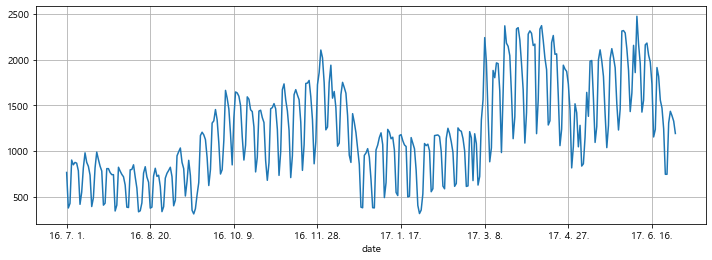

In [6]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [7]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [8]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [10]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109637
430.6284101894695
429.53280466762925
330.4777305307993


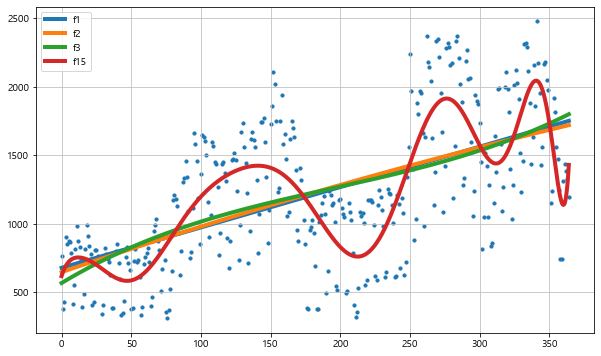

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

# 7-2 Prophet 모듈을 이용한 forecast

In [12]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [13]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,681.513207,1106.425540
421,2017-08-26,481.544412,267.564718,697.311870
422,2017-08-27,614.212001,406.950241,818.093245
423,2017-08-28,1166.966207,960.178432,1380.409307
424,2017-08-29,1203.000155,994.929956,1411.942327


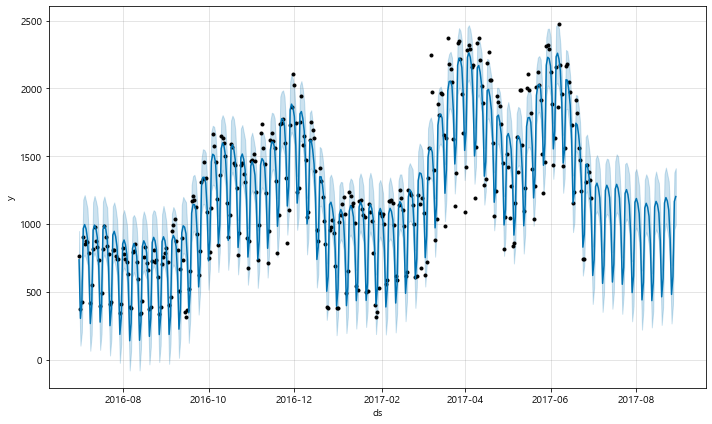

In [15]:
m.plot(forecast);

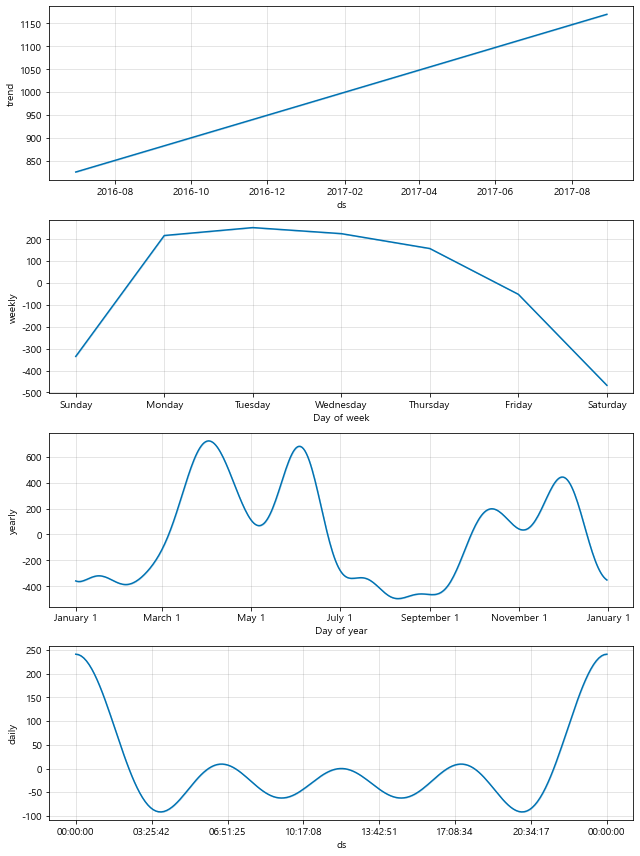

In [16]:
m.plot_components(forecast);

# 7-3 Seasonal 시계열 분석으로 주식 데이터 분석

In [1]:
import pandas_datareader.data as web
import datetime

In [28]:
start = datetime.datetime(2003, 1, 1)
end = datetime.datetime(2017, 6, 30)
KIA = data.get_data_yahoo('000270.KS', start, end)
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글동작 안됨
KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-01,8800.0,8800.0,8800.0,8800.0,0.0,6326.816895
2003-01-02,9200.0,8950.0,9000.0,9190.0,688900.0,6607.209473
2003-01-03,9720.0,9330.0,9350.0,9550.0,1419800.0,6866.033203
2003-01-06,9760.0,9500.0,9720.0,9700.0,1076300.0,6973.878418
2003-01-07,9920.0,9420.0,9900.0,9420.0,1034100.0,6772.569824


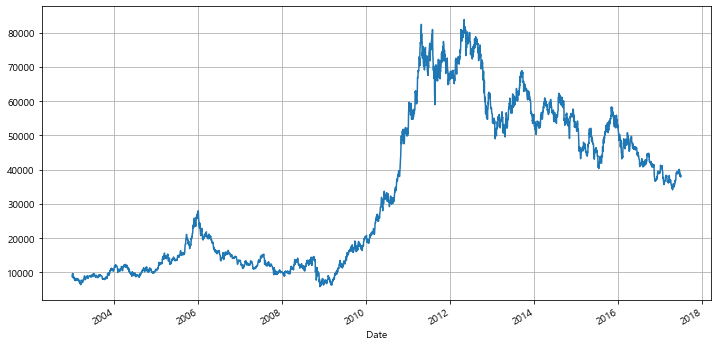

In [29]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [30]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-01,8800.0,8800.0,8800.0,8800.0,0.0,6326.816895
2003-01-02,9200.0,8950.0,9000.0,9190.0,688900.0,6607.209473
2003-01-03,9720.0,9330.0,9350.0,9550.0,1419800.0,6866.033203
2003-01-06,9760.0,9500.0,9720.0,9700.0,1076300.0,6973.878418
2003-01-07,9920.0,9420.0,9900.0,9420.0,1034100.0,6772.569824
...,...,...,...,...,...,...
2016-12-23,39350.0,38650.0,38700.0,39100.0,1070783.0,33386.179688
2016-12-26,39350.0,38850.0,39100.0,39000.0,465612.0,33300.800781
2016-12-27,39700.0,39050.0,39050.0,39500.0,879686.0,33727.730469


In [31]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2003-01-01,8800.0
1,2003-01-02,9190.0
2,2003-01-03,9550.0
3,2003-01-06,9700.0
4,2003-01-07,9420.0


In [32]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [33]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3880,2017-12-25
3881,2017-12-26
3882,2017-12-27
3883,2017-12-28
3884,2017-12-29


In [35]:
# 책에 없음
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3880,2017-12-25,34682.555538,24576.006697,43688.386915
3881,2017-12-26,34723.187036,25255.116550,44175.247793
3882,2017-12-27,34677.248584,25053.658382,43255.644735
3883,2017-12-28,34626.390738,25147.689691,44375.266150
3884,2017-12-29,34540.843622,24835.220840,44116.471729


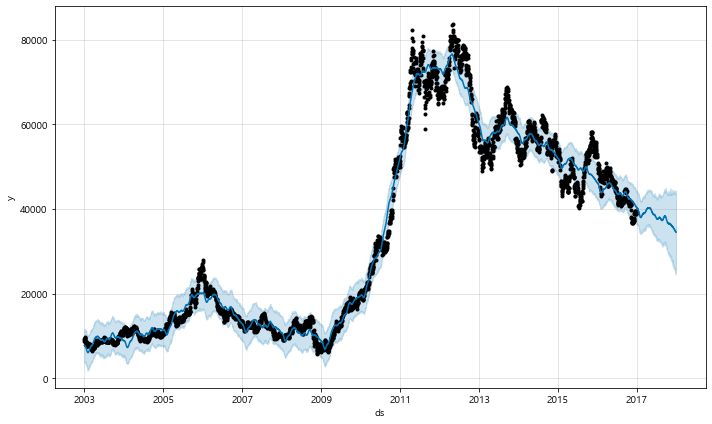

In [36]:
m.plot(forecast);

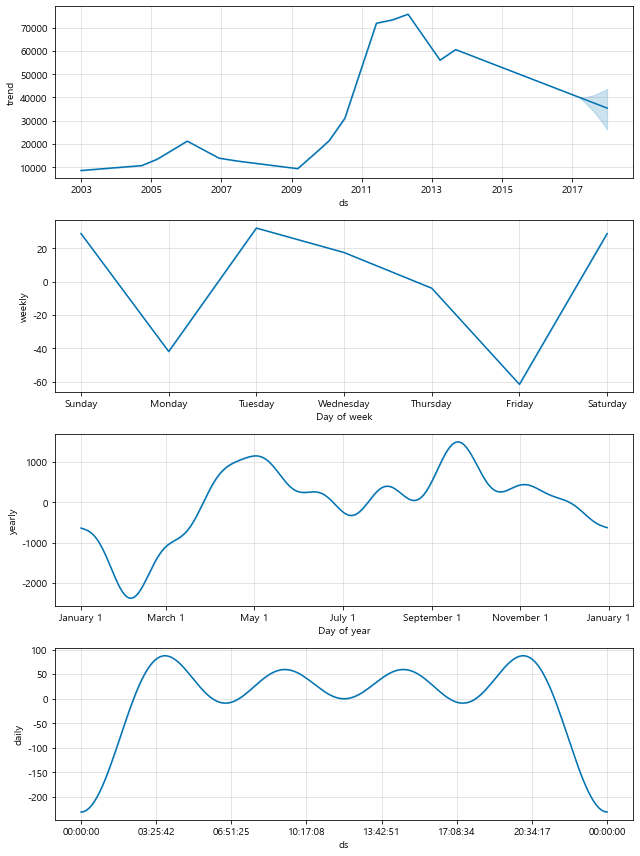

In [37]:
m.plot_components(forecast);

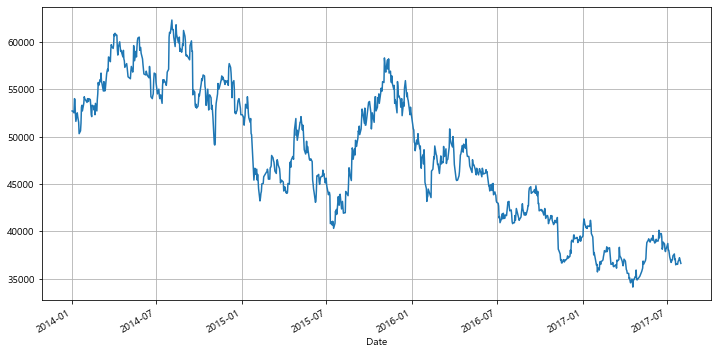

In [38]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

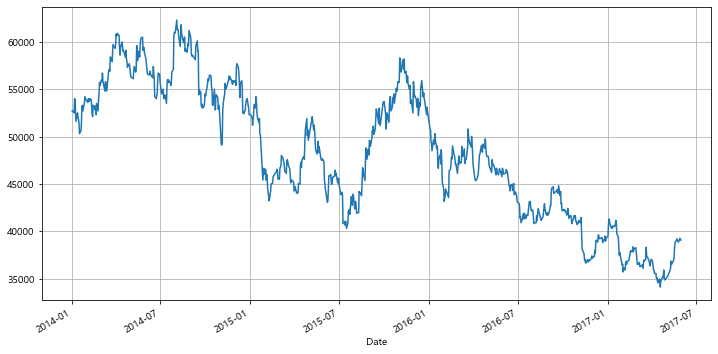

In [39]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [40]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [42]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [43]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


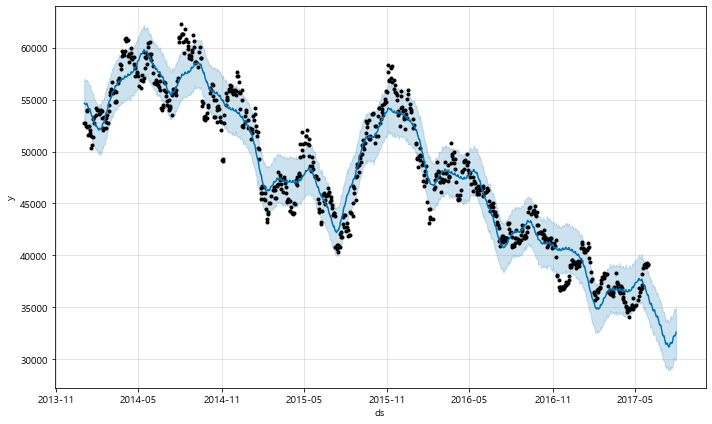

In [44]:
forecast = m.predict(future)
m.plot(forecast);

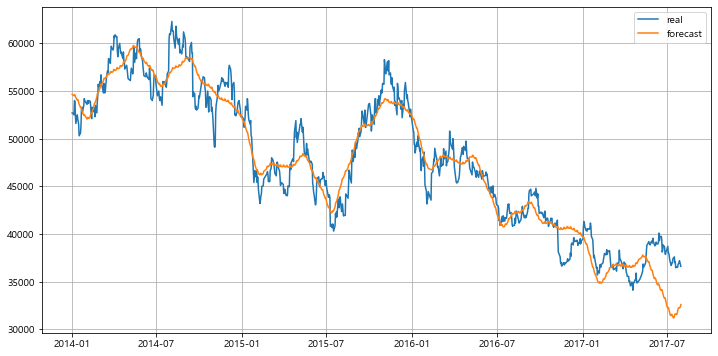

In [45]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

# 7-4 Growth Model과 Holiday Forecast

In [47]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [48]:
df['cap'] = 8.5

In [49]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

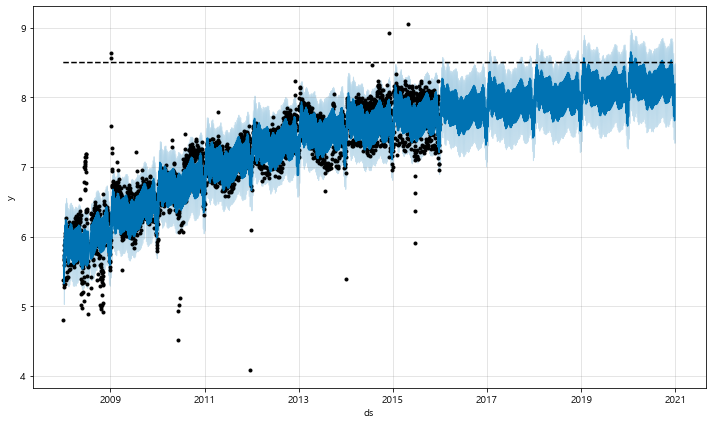

In [50]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

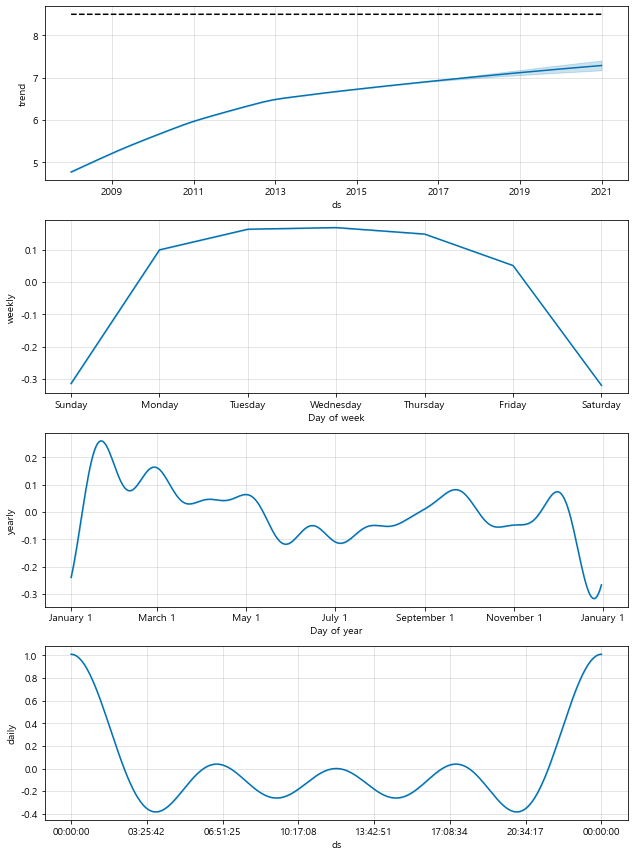

In [53]:
forecast = m.predict(future)
m.plot_components(forecast);

# 7-4-2 연간분석?

In [54]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

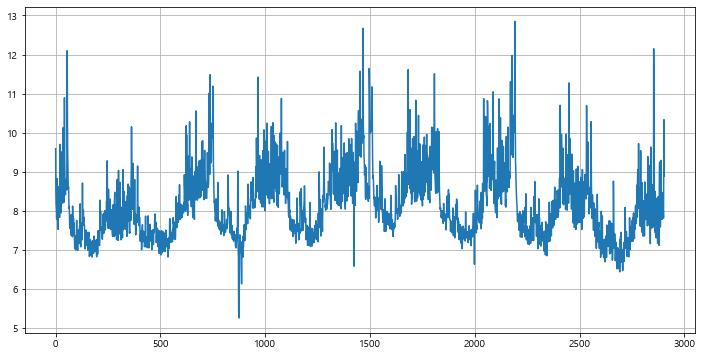

In [55]:
df.y.plot(figsize=(12,6), grid=True);

In [56]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [57]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [58]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224221,1.194167
2191,2014-02-03,1.901795,1.480597
2532,2015-01-11,1.224221,0.000000
2533,2015-01-12,1.901795,0.000000
2901,2016-01-17,1.224221,0.000000
2902,2016-01-18,1.901795,0.000000
2908,2016-01-24,1.224221,0.000000
2909,2016-01-25,1.901795,0.000000
2922,2016-02-07,1.224221,1.194167
2923,2016-02-08,1.901795,1.480597


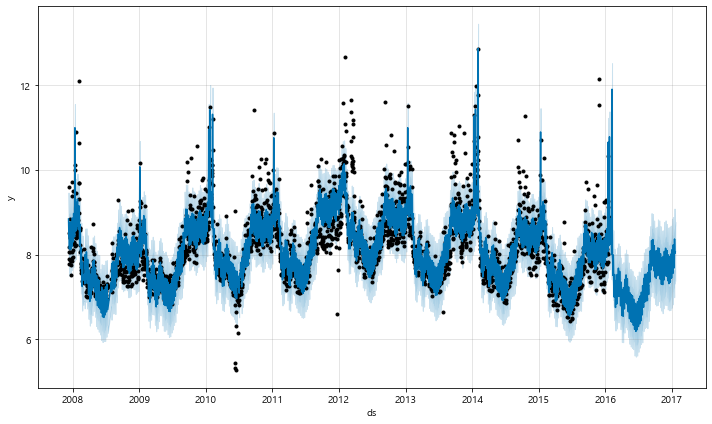

In [59]:
m.plot(forecast);

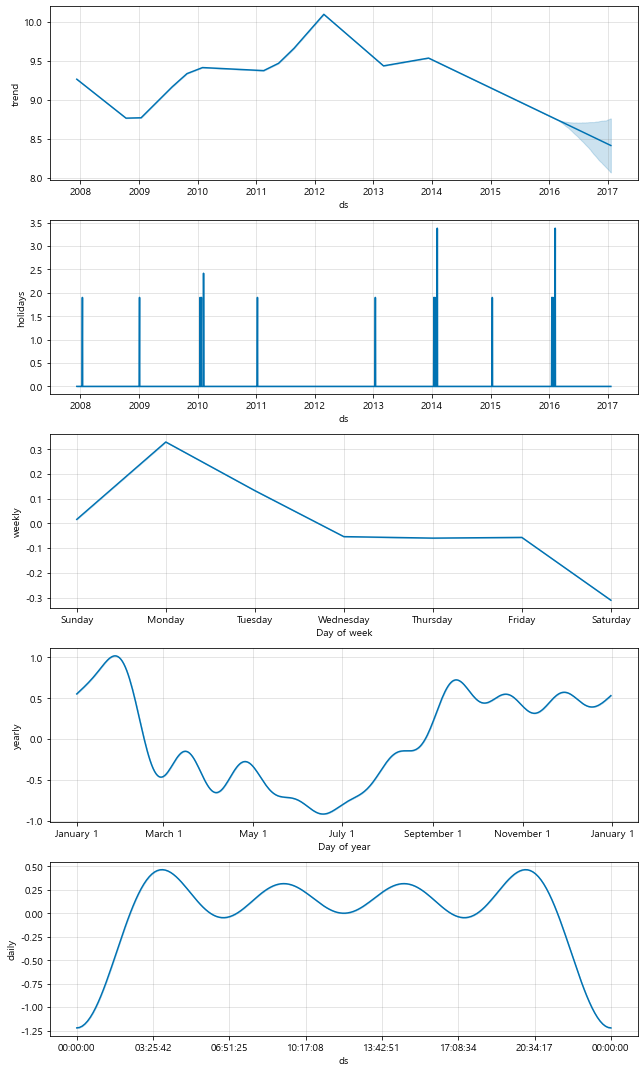

In [60]:
m.plot_components(forecast);